# Evaluating Global Expainability

In [1]:
from utils import make_test_set_esnli, make_test_set_mnli, make_test_set_cose
from model import ZeroShotNLI, ZeroShotLearner
from explainer import Explainer

In [2]:
# number of explanations
NUM_EXPL = 5

#importing dataset
dataset_esnli = make_test_set_esnli(size=NUM_EXPL) # 9830 is dev size esnli (originally 9842 but 12 instance are wrongly annotated)
dataset_mnli = make_test_set_mnli(size=NUM_EXPL) # 9815 is dev size mnli
dataset_cose = make_test_set_cose(size=NUM_EXPL) # 718 (originally 1221 is dev size cose but 503 instances have bad explanations, i.e. the whole question highlighted))

Found cached dataset multi_nli (/Users/henningheyen/.cache/huggingface/datasets/multi_nli/default/0.0.0/591f72eb6263d1ab527561777936b199b714cda156d35716881158a2bd144f39)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset cos_e (/Users/henningheyen/.cache/huggingface/datasets/cos_e/v1.11/1.11.0/e8dc57a5b321a2a97063efb8d316d6d8a0d9a2d3a392dafc913e55bed42736d2)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
#calculating average explanation length per dataset
import numpy as np

full_dataset_esnli = make_test_set_esnli(size=9830, remove_bad_explanations=True) # 9830 is dev size esnli (originally 9842 but 12 instance are wrongly annotated)
full_dataset_cose = make_test_set_cose(size=718, remove_bad_explanations=True) # 718 (originally 1221 is dev size cose but 503 instances have bad explanations, i.e. the whole question highlighted))

len_esnli = [len(full_dataset_esnli['extractive_explanation'][i])/(len(full_dataset_esnli['sentence_pairs'][i][0].split())+len(full_dataset_esnli['sentence_pairs'][i][1].split())) for i in range(9830)]
len_cose = [len(full_dataset_cose['extractive_explanation'][i])/len(full_dataset_cose['question'][i].split()) for i in range(718)]

avg_len_esnli = np.mean(len_esnli)
avg_len_cose = np.mean(len_cose)

print('average explanation input ratio e-SNLI: ', avg_len_esnli)
print('average explanation input ratio CoS-e: ', avg_len_cose)

Found cached dataset cos_e (/Users/henningheyen/.cache/huggingface/datasets/cos_e/v1.11/1.11.0/e8dc57a5b321a2a97063efb8d316d6d8a0d9a2d3a392dafc913e55bed42736d2)


  0%|          | 0/2 [00:00<?, ?it/s]

average explanation input ratio e-SNLI:  0.19858092123245383
average explanation input ratio CoS-e:  0.2605110957380536


# Calculating Explanations

## Natural Language Inference

In [4]:
# Natural Language Inference
xsmall = ZeroShotNLI(model_name='nli-deberta-v3-xsmall')
small = ZeroShotNLI(model_name='nli-deberta-v3-small')
base = ZeroShotNLI(model_name='nli-deberta-v3-base')
large = ZeroShotNLI(model_name='nli-deberta-v3-large')

models = [
    xsmall,
    small,
    base,
    large
]

model_names = [
    'xsmall',
    'small',
    'base',
    'large'
]

In [5]:
explainer = Explainer(class_names=['contradiction', 'entailment', 'neutral'])

### MNLI

In [6]:
%%time

# Computing LIME explanations on xsmall
explanations_xsmall = explainer.compute_explanations(
    sentences = dataset_mnli['sentence_pairs'], 
    model=xsmall, 
    num_samples=100,  
    task='NLI',
    )

CPU times: user 1min 24s, sys: 19.3 s, total: 1min 44s
Wall time: 2min 34s


In [7]:
%%time

# Computing LIME explanations on small
explanations_small = explainer.compute_explanations(
   sentences = dataset_mnli['sentence_pairs'], 
   model=small, 
   num_samples=100,  
   task='NLI',
   )

CPU times: user 1min 14s, sys: 18.5 s, total: 1min 33s
Wall time: 13min 46s


In [8]:
%%time

# Computing LIME explanations on base
explanations_base = explainer.compute_explanations(
   sentences = dataset_mnli['sentence_pairs'], 
   model=base, 
   num_samples=100,  
   task='NLI',
   )

CPU times: user 2min 13s, sys: 22.9 s, total: 2min 36s
Wall time: 2min 26s


In [9]:
%%time

# Computing LIME explanations on large
explanations_large = explainer.compute_explanations(
   sentences = dataset_mnli['sentence_pairs'], 
   model=large, 
   num_samples=100,  
   task='NLI',
   )

CPU times: user 7min 53s, sys: 1min 2s, total: 8min 55s
Wall time: 8min 30s


In [10]:
explanations_mnli = [
    explanations_xsmall, 
    explanations_small, 
    explanations_base, 
    explanations_large,
    ]

#### e-SNLI

In [11]:
%%time

# Computing LIME explanations on xsmall
explanations_xsmall = explainer.compute_explanations(
    sentences = dataset_esnli['sentence_pairs'], 
    model=xsmall, 
    num_samples=100,  
    task='NLI',
    )

CPU times: user 23.5 s, sys: 614 ms, total: 24.1 s
Wall time: 22.9 s


In [12]:
%%time

# Computing LIME explanations on small
explanations_small = explainer.compute_explanations(
   sentences = dataset_esnli['sentence_pairs'], 
   model=small, 
   num_samples=100,  
   task='NLI',
   )

CPU times: user 39.3 s, sys: 5.81 s, total: 45.1 s
Wall time: 41.6 s


In [13]:
%%time

# Computing LIME explanations on base
explanations_base = explainer.compute_explanations(
   sentences = dataset_esnli['sentence_pairs'], 
   model=base, 
   num_samples=100,  
   task='NLI',
   )

CPU times: user 1min 18s, sys: 12 s, total: 1min 30s
Wall time: 1min 23s


In [14]:
%%time

# Computing LIME explanations on large
explanations_large = explainer.compute_explanations(
   sentences = dataset_esnli['sentence_pairs'], 
   model=large, 
   num_samples=100,  
   task='NLI',
   )

CPU times: user 4min 32s, sys: 39.8 s, total: 5min 11s
Wall time: 5min


In [15]:
explanations_esnli = [
    explanations_xsmall, 
    explanations_small, 
    explanations_base, 
    explanations_large,
    ]

## Zero Shot Classification

In [16]:
# Zero Shot Classification
xsmall = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-xsmall')
small = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-small')
base = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-base')
large = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-large')

models = [
    xsmall,
    small,
    base,
    large,
]

model_names = [
    'xsmall',
    'small',
    'base',
    'large',
]

'HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)' thrown while requesting HEAD https://huggingface.co/cross-encoder/nli-deberta-v3-xsmall/resolve/main/config.json


In [17]:
# no class names becuase of zero shot classification setting
explainer = Explainer()

In [18]:
%%time

# Computing LIME explanations on xsmall
explanations_xsmall = explainer.compute_explanations(
   sentences = dataset_cose['question'], 
   model=xsmall, 
   num_samples=100,  
   class_names_list=dataset_cose['candidate_labels_list']
   )

CPU times: user 6min 30s, sys: 9.53 s, total: 6min 40s
Wall time: 6min 36s


In [19]:
%%time

# Computing LIME explanations on small
explanations_small = explainer.compute_explanations(
   sentences = dataset_cose['question'], 
   model=small, 
   num_samples=100,  
   class_names_list=dataset_cose['candidate_labels_list']
   )

CPU times: user 11min 55s, sys: 9.91 s, total: 12min 5s
Wall time: 12min 2s


In [20]:
%%time

# Computing LIME explanations on base
explanations_base = explainer.compute_explanations(
   sentences = dataset_cose['question'], 
   model=base, 
   num_samples=100,  
   class_names_list=dataset_cose['candidate_labels_list']
   )

CPU times: user 24min 31s, sys: 22.7 s, total: 24min 54s
Wall time: 24min 46s


In [21]:
%%time

# Computing LIME explanations on large
explanations_large = explainer.compute_explanations(
   sentences = dataset_cose['question'], 
   model=large, 
   num_samples=100,  
   class_names_list=dataset_cose['candidate_labels_list']
   )

CPU times: user 1h 18min 44s, sys: 2min 15s, total: 1h 21min
Wall time: 1h 21min 8s


In [22]:
explanations_cose = [
    explanations_xsmall, 
    explanations_small, 
    explanations_base, 
    explanations_large,
    ]

## Faithfulness (Comprehensiveness and Sufficiency)

### Natural Langugage Inference

In [23]:
# Natural Language Inference
xsmall = ZeroShotNLI(model_name='nli-deberta-v3-xsmall')
small = ZeroShotNLI(model_name='nli-deberta-v3-small')
base = ZeroShotNLI(model_name='nli-deberta-v3-base')
large = ZeroShotNLI(model_name='nli-deberta-v3-large')

models = [
    xsmall,
    small,
    base,
    large
]

model_names = [
    'xsmall',
    'small',
    'base',
    'large'
]

#### MNLI

In [24]:
# Calculating aggregated comprehensiveness and sufficiency on 100 explanations
comp_list_mnli = []
suff_list_mnli = []

for i, model in enumerate(models):
    
    print('model: ', model_names[i])

    comp_agg = [explainer.aggregated_metric(metric='comprehensiveness', explanation=explanations_mnli[i][j], sentence=dataset_mnli['sentence_pairs'][j], predict=model.predict, verbose=False, bins=[0.1,0.3,0.5], task='NLI') for j in range(NUM_EXPL)]

    comp_list_mnli.append(comp_agg)

    suff_agg = [explainer.aggregated_metric(metric='sufficiency', explanation=explanations_mnli[i][j], sentence=dataset_mnli['sentence_pairs'][j], predict=model.predict, verbose=False, bins=[0.1,0.3,0.5], task='NLI') for j in range(NUM_EXPL)]

    suff_list_mnli.append(suff_agg)


model:  xsmall
model:  small
model:  base
model:  large


In [25]:
for i, model in enumerate(models):
    print(f'MNLI average aggregated comprehensiveness {model_names[i]}: ', np.mean(comp_list_mnli[i]))
    print(f'MNLI average aggregated sufficiency {model_names[i]}: ', np.mean(suff_list_mnli[i]))

MNLI average aggregated comprehensiveness xsmall:  0.7545049
MNLI average aggregated sufficiency xsmall:  0.13171107
MNLI average aggregated comprehensiveness small:  0.7405578
MNLI average aggregated sufficiency small:  0.058374256
MNLI average aggregated comprehensiveness base:  0.7162611
MNLI average aggregated sufficiency base:  0.06786741
MNLI average aggregated comprehensiveness large:  0.76860434
MNLI average aggregated sufficiency large:  0.22005364


#### e-SNLI

In [26]:
# Calculating aggregated comprehensiveness and sufficiency on 100 explanations
comp_list_esnli = []
suff_list_esnli = []

for i, model in enumerate(models):
    
    print('model: ', model_names[i])

    comp_agg = [explainer.aggregated_metric(metric='comprehensiveness', explanation=explanations_esnli[i][j], sentence=dataset_esnli['sentence_pairs'][j], predict=model.predict, verbose=False, bins=[0.1,0.3,0.5], task='NLI') for j in range(NUM_EXPL)]

    comp_list_esnli.append(comp_agg)

    suff_agg = [explainer.aggregated_metric(metric='sufficiency', explanation=explanations_esnli[i][j], sentence=dataset_esnli['sentence_pairs'][j], predict=model.predict, verbose=False, bins=[0.1,0.3,0.5], task='NLI') for j in range(NUM_EXPL)]

    suff_list_esnli.append(suff_agg)

model:  xsmall
model:  small
model:  base
model:  large


In [27]:
for i, model in enumerate(models):
    print(f'e-SNLI average aggregated comprehensiveness {model_names[i]}: ', np.mean(comp_list_esnli[i]))
    print(f'e-SNLI average aggregated sufficiency {model_names[i]}: ', np.mean(suff_list_esnli[i]))

e-SNLI average aggregated comprehensiveness xsmall:  0.87449694
e-SNLI average aggregated sufficiency xsmall:  0.15445168
e-SNLI average aggregated comprehensiveness small:  0.8999321
e-SNLI average aggregated sufficiency small:  0.07939016
e-SNLI average aggregated comprehensiveness base:  0.7714423
e-SNLI average aggregated sufficiency base:  0.05263756
e-SNLI average aggregated comprehensiveness large:  0.7821625
e-SNLI average aggregated sufficiency large:  0.055990852


### Zero Shot Classification

In [28]:
# Zero Shot Classification
xsmall = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-xsmall')
small = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-small')
base = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-base')
large = ZeroShotLearner(model_name='cross-encoder/nli-deberta-v3-large')

models = [
    xsmall,
    small,
    base,
    large,
]

model_names = [
    'xsmall',
    'small',
    'base',
    'large',
]

#### CoS-e

In [29]:
# Calculating aggregated comprehensiveness and sufficiency on 100 explanations
comp_list_cose = []
suff_list_cose = []

for i, model in enumerate(models):
    
    print('model: ', model_names[i])

    comp_agg = [explainer.aggregated_metric(metric='comprehensiveness', explanation=explanations_cose[i][j], sentence=dataset_cose['question'][j], predict=model.predict, verbose=False, bins=[0.1,0.3,0.5], task='ZSC', candidate_labels=dataset_cose['candidate_labels_list'][j]) for j in range(NUM_EXPL)]

    comp_list_cose.append(comp_agg)

    suff_agg = [explainer.aggregated_metric(metric='sufficiency', explanation=explanations_cose[i][j], sentence=dataset_cose['question'][j], predict=model.predict, verbose=False, bins=[0.1,0.3,0.5], task='ZSC', candidate_labels=dataset_cose['candidate_labels_list'][j]) for j in range(NUM_EXPL)]

    suff_list_cose.append(suff_agg)

model:  xsmall
model:  small
model:  base
model:  large


In [30]:
for i, model in enumerate(models):
    print(f'CoS-e average aggregated comprehensiveness {model_names[i]}: ', np.mean(comp_list_cose[i]))
    print(f'CoS-e average aggregated sufficiency {model_names[i]}: ', np.mean(suff_list_cose[i]))

CoS-e average aggregated comprehensiveness xsmall:  0.2321231697996457
CoS-e average aggregated sufficiency xsmall:  -0.10452483793099723
CoS-e average aggregated comprehensiveness small:  0.3997087893386682
CoS-e average aggregated sufficiency small:  -0.030180058379968
CoS-e average aggregated comprehensiveness base:  0.39675062000751493
CoS-e average aggregated sufficiency base:  -0.0796395182609558
CoS-e average aggregated comprehensiveness large:  0.40856975937883055
CoS-e average aggregated sufficiency large:  -0.0059112494190533965


## Plausibility (IOU and Token Level F1 Scores)

#### e-SNLI

In [31]:
explanation_tokens_lists = [explainer.get_explanation_list(explanations_esnli[i], top_percent=avg_len_esnli) for i in range(4)]
ground_truth_list = dataset_esnli['extractive_explanation']

iou_macro_scores = [explainer.compute_macro_iou(explanation_tokens_list, ground_truth_list) for explanation_tokens_list in explanation_tokens_lists]
tokenf1_macro_scores = [explainer.compute_macro_f1(explanation_tokens_list, ground_truth_list) for explanation_tokens_list in explanation_tokens_lists]

for i, model in enumerate(models):
    print(f'{model_names[i]} macro_iou for {NUM_EXPL} number of explanations (e-SNLI): ', iou_macro_scores[i])
    print(f'{model_names[i]} macro_f1 for {NUM_EXPL} number of explanations (e-SNLI): ', tokenf1_macro_scores[i])

xsmall macro_iou for 5 number of explanations (e-SNLI):  0.3
xsmall macro_f1 for 5 number of explanations (e-SNLI):  0.4504761904761905
small macro_iou for 5 number of explanations (e-SNLI):  0.2019047619047619
small macro_f1 for 5 number of explanations (e-SNLI):  0.33380952380952383
base macro_iou for 5 number of explanations (e-SNLI):  0.3619047619047619
base macro_f1 for 5 number of explanations (e-SNLI):  0.4671428571428572
large macro_iou for 5 number of explanations (e-SNLI):  0.39
large macro_f1 for 5 number of explanations (e-SNLI):  0.5280952380952381


#### CoS-e

In [32]:
explanation_tokens_lists = [explainer.get_explanation_list(explanations_cose[i], top_percent=avg_len_cose) for i in range(4)]
ground_truth_list = dataset_cose['extractive_explanation']

iou_macro_scores = [explainer.compute_macro_iou(explanation_tokens_list, ground_truth_list) for explanation_tokens_list in explanation_tokens_lists]
tokenf1_macro_scores = [explainer.compute_macro_f1(explanation_tokens_list, ground_truth_list) for explanation_tokens_list in explanation_tokens_lists]

for i, model in enumerate(models):
    print(f'{model_names[i]} macro_iou for {NUM_EXPL} number of explanations (CoS-e): ', iou_macro_scores[i])
    print(f'{model_names[i]} macro_f1 for {NUM_EXPL} number of explanations (CoS-e): ', tokenf1_macro_scores[i])

xsmall macro_iou for 5 number of explanations (CoS-e):  0.11714285714285713
xsmall macro_f1 for 5 number of explanations (CoS-e):  0.1811965811965812
small macro_iou for 5 number of explanations (CoS-e):  0.13833333333333334
small macro_f1 for 5 number of explanations (CoS-e):  0.2302586302586303
base macro_iou for 5 number of explanations (CoS-e):  0.10500000000000001
base macro_f1 for 5 number of explanations (CoS-e):  0.17311577311577311
large macro_iou for 5 number of explanations (CoS-e):  0.17833333333333332
large macro_f1 for 5 number of explanations (CoS-e):  0.29692529692529696


# Importing Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# Importing results calculated on Colab servers
import json


# Read the file
with open('results/explainability_results_mnli.json', 'r') as f:
    explainability_results_mnli = json.load(f)

# Read the file
with open('results/explainability_results_esnli.json', 'r') as f:
    explainability_results_esnli = json.load(f)

# Read the file
with open('results/explainability_results_cose_wo_large.json', 'r') as f:
    explainability_results_cose_wo_large = json.load(f)

# Read the file
with open('results/explainability_results_cose_large.json', 'r') as f:
    explainability_results_cose_large = json.load(f)


In [5]:
# # Will be replaced after computation has finished
# explainability_results_cose = explainability_results_cose_wo_large

# # Temporary results
# large_results_cose = {
#     'explanations_as_list': None,
#     'faithfulness': {
#         'comprehensiveness': None,
#         'macro_comprehensiveness': 0.3910369690948089,
#         'sufficiency': None,
#         'macro_sufficiency': -0.07993169858741261,
#     },
#     'plausibility': {
#         'iou': None,
#         'macro_iou': 0.23037491476531724,
#         'tokenf1': None,
#         'macro_tokenf1': 0.3577848869826424,
#     },
# }

# explainability_results_cose['cose']['large'] = large_results_cose

# Merging cose results
explainability_results_cose = explainability_results_cose_wo_large
explainability_results_cose['cose']['large'] = explainability_results_cose_large['cose']['large']


In [3]:
def print_key_tree(d, indent=0):
    for key, value in d.items():
        print('  ' * indent + str(key) + ": " + str(type(value)))
        if isinstance(value, dict):
            print_key_tree(value, indent + 1)
        elif isinstance(value, list):
            if all(isinstance(i, dict) for i in value):
                for sub_dict in value:
                    print_key_tree(sub_dict, indent + 1)

In [6]:
print_key_tree(explainability_results_cose)

cose: <class 'dict'>
  xsmall: <class 'dict'>
    explanations_as_list: <class 'list'>
    faithfulness: <class 'dict'>
      comprehensiveness: <class 'list'>
      macro_comprehensiveness: <class 'float'>
      sufficiency: <class 'list'>
      macro_sufficiency: <class 'float'>
    plausibility: <class 'dict'>
      iou: <class 'list'>
      macro_iou: <class 'float'>
      tokenf1: <class 'list'>
      macro_tokenf1: <class 'float'>
  small: <class 'dict'>
    explanations_as_list: <class 'list'>
    faithfulness: <class 'dict'>
      comprehensiveness: <class 'list'>
      macro_comprehensiveness: <class 'float'>
      sufficiency: <class 'list'>
      macro_sufficiency: <class 'float'>
    plausibility: <class 'dict'>
      iou: <class 'list'>
      macro_iou: <class 'float'>
      tokenf1: <class 'list'>
      macro_tokenf1: <class 'float'>
  base: <class 'dict'>
    explanations_as_list: <class 'list'>
    faithfulness: <class 'dict'>
      comprehensiveness: <class 'list'>
   

In [7]:
# all in one dictionary:
explainability_results = {}
explainability_results['mnli'] = explainability_results_mnli['mnli']
explainability_results['esnli'] = explainability_results_esnli['esnli']
explainability_results['cose'] = explainability_results_cose['cose']

In [8]:
print_key_tree(explainability_results)

mnli: <class 'dict'>
  xsmall: <class 'dict'>
    explanations_as_list: <class 'list'>
    faithfulness: <class 'dict'>
      comprehensiveness: <class 'list'>
      macro_comprehensiveness: <class 'float'>
      sufficiency: <class 'list'>
      macro_sufficiency: <class 'float'>
  small: <class 'dict'>
    explanations_as_list: <class 'list'>
    faithfulness: <class 'dict'>
      comprehensiveness: <class 'list'>
      macro_comprehensiveness: <class 'float'>
      sufficiency: <class 'list'>
      macro_sufficiency: <class 'float'>
  base: <class 'dict'>
    explanations_as_list: <class 'list'>
    faithfulness: <class 'dict'>
      comprehensiveness: <class 'list'>
      macro_comprehensiveness: <class 'float'>
      sufficiency: <class 'list'>
      macro_sufficiency: <class 'float'>
  large: <class 'dict'>
    explanations_as_list: <class 'list'>
    faithfulness: <class 'dict'>
      comprehensiveness: <class 'list'>
      macro_comprehensiveness: <class 'float'>
      sufficie

In [9]:
model_names = ['xsmall', 'small', 'base', 'large']
model_sizes = ['xsmall (22m)', 'small (44m)', 'base (86m) ', 'large (304m)']
datasets = ['esnli', 'mnli', 'cose']
dataset_labels = ['e-SNLI', 'MNLI', 'CoS-e']

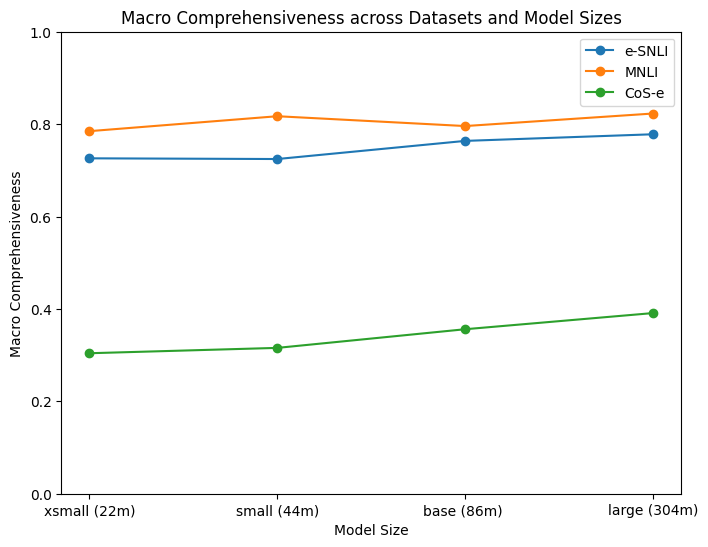

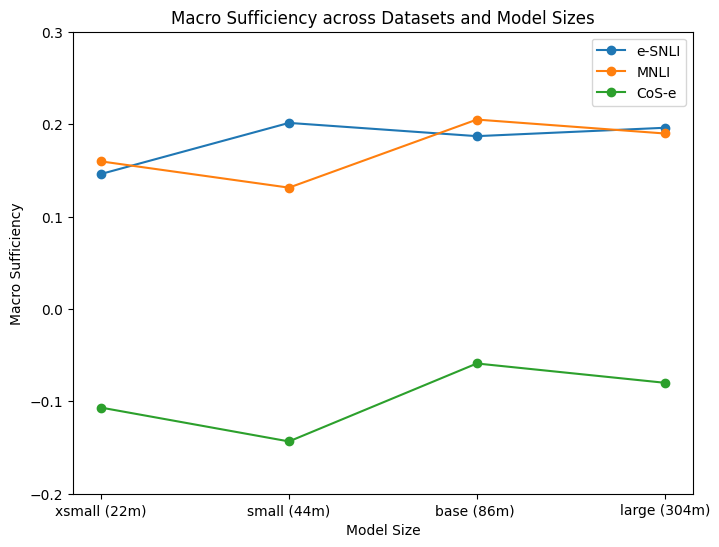

In [10]:
# Plotting macro_comprehensiveness
plt.figure(figsize=(8, 6))
for dataset, label in zip(datasets, dataset_labels):
    y_values = [explainability_results[dataset][model_name]['faithfulness']['macro_comprehensiveness'] for model_name in model_names]
    plt.plot(model_sizes, y_values, 'o-', label=label)  # 'o-' adds circle markers

plt.ylim(0,1)
plt.xlabel('Model Size')
plt.ylabel('Macro Comprehensiveness')
plt.title('Macro Comprehensiveness across Datasets and Model Sizes')
plt.legend()
plt.show()

# Plotting macro_sufficiency
plt.figure(figsize=(8, 6))
for dataset, label in zip(datasets, dataset_labels):
    y_values = [explainability_results[dataset][model_name]['faithfulness']['macro_sufficiency'] for model_name in model_names]
    plt.plot(model_sizes, y_values, 'o-', label=label)  # 'o-' adds circle markers

plt.ylim(-0.2,0.3)
plt.xlabel('Model Size')
plt.ylabel('Macro Sufficiency')
plt.title('Macro Sufficiency across Datasets and Model Sizes')
plt.legend()
plt.show()


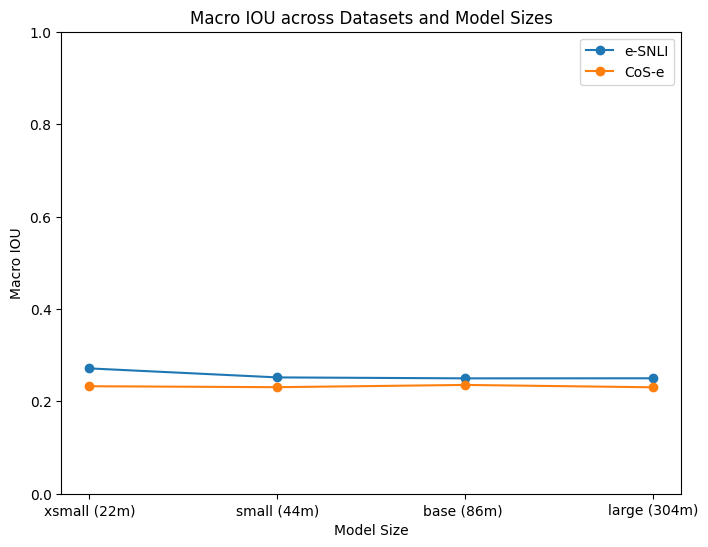

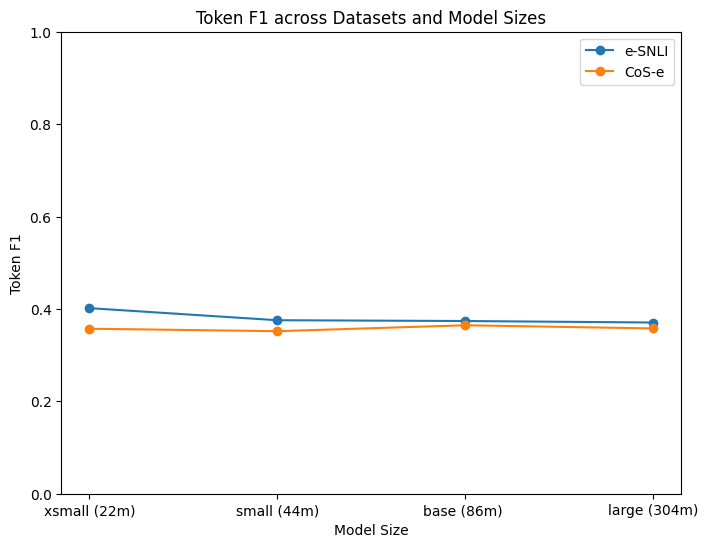

In [11]:
# Plotting macro_iou
plt.figure(figsize=(8, 6))
for dataset, label in zip(datasets, dataset_labels):
    if dataset == 'mnli':
        continue    
    y_values = [explainability_results[dataset][model_name]['plausibility']['macro_iou'] for model_name in model_names]
    plt.plot(model_sizes, y_values, 'o-', label=label)  # 'o-' adds circle markers

plt.ylim(0, 1)  # You can adjust these limits based on your actual data
plt.xlabel('Model Size')
plt.ylabel('Macro IOU')
plt.title('Macro IOU across Datasets and Model Sizes')
plt.legend()
plt.show()

# Plotting token_f1
plt.figure(figsize=(8, 6))
for dataset, label in zip(datasets, dataset_labels):
    if dataset == 'mnli':
        continue
    y_values = [explainability_results[dataset][model_name]['plausibility']['macro_tokenf1'] for model_name in model_names]
    plt.plot(model_sizes, y_values, 'o-', label=label)  # 'o-' adds circle markers

plt.ylim(0, 1)  # You can adjust these limits based on your actual data
plt.xlabel('Model Size')
plt.ylabel('Token F1')
plt.title('Token F1 across Datasets and Model Sizes')
plt.legend()
plt.show()

In [12]:
# table
data = []

for dataset, label in zip(datasets, dataset_labels):
    for model_name in model_names:
        macro_comprehensiveness = round(explainability_results[dataset][model_name]['faithfulness']['macro_comprehensiveness'],3)
        macro_sufficiency = round(explainability_results[dataset][model_name]['faithfulness']['macro_sufficiency'],3)
        if dataset == 'mnli':
            macro_iou = '-'
            macro_tokenf1 = '-'
        else:
            macro_iou = round(explainability_results[dataset][model_name]['plausibility']['macro_iou'],3)
            macro_tokenf1 = round(explainability_results[dataset][model_name]['plausibility']['macro_tokenf1'],3)
            
        data.append([label, model_name, macro_comprehensiveness, macro_sufficiency, macro_iou, macro_tokenf1])

df_explainabliity_results = pd.DataFrame(data, columns=['Dataset', 'Model Size', 'Macro Comprehensiveness', 'Macro Sufficiency', 'Macro IOU', 'Macro Token F1'])

df_explainabliity_results.head(50)

,Dataset,Model Size,Macro Comprehensiveness,Macro Sufficiency,Macro IOU,Macro Token F1
0,e-SNLI,xsmall,0.726,0.146,0.271,0.402
1,e-SNLI,small,0.724,0.201,0.252,0.376
2,e-SNLI,base,0.764,0.187,0.25,0.374
3,e-SNLI,large,0.778,0.196,0.25,0.371
4,MNLI,xsmall,0.785,0.160,-,-
5,MNLI,small,0.817,0.131,-,-
6,MNLI,base,0.796,0.205,-,-
7,MNLI,large,0.823,0.190,-,-
8,CoS-e,xsmall,0.304,-0.107,0.233,0.357
9,CoS-e,small,0.316,-0.143,0.231,0.352


In [44]:
df_explainabliity_results.to_csv('results/df_explainabliity_results.csv', index=False)